## Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import numpy.matlib as matlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import itertools
import random
import math

## Reading Dataset

In [ ]:
df = pd.read_csv('iris.csv')
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


## Preprocessing Dataset and Splitting it into train and test set

In [ ]:
train_dataset, test_dataset = df[:100], df[101:]
train_x, test_x = train_dataset.iloc[:, :-1], test_dataset.iloc[:, :-1].reset_index(drop=True)
train_x.head(5)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
test_x.head(5)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,102,5.8,2.7,5.1,1.9
1,103,7.1,3.0,5.9,2.1
2,104,6.3,2.9,5.6,1.8
3,105,6.5,3.0,5.8,2.2
4,106,7.6,3.0,6.6,2.1


In [ ]:
def datasetRound(dataset):
    for i in range(len(dataset)):
        dataset['Sepal.Length'][i] = round(dataset['Sepal.Length'][i])
        dataset['Sepal.Width'][i] = round(dataset['Sepal.Width'][i])
        dataset['Petal.Length'][i] = round(dataset['Petal.Length'][i])
        dataset['Petal.Width'][i] = round(dataset['Petal.Width'][i])
    return dataset
ntrain_x = datasetRound(train_x)
ntest_x = datasetRound(test_x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

## Function to Store Weights

In [ ]:
def storeWeights(dataset):
    w = []
    for i in range(len(dataset)):
        w.append([dataset['Sepal.Length'][i], dataset['Sepal.Width'][i], dataset['Petal.Length'][i], dataset['Petal.Width'][i]])
    return np.array(w) 
features = storeWeights(ntrain_x)

## Visualizing patterns


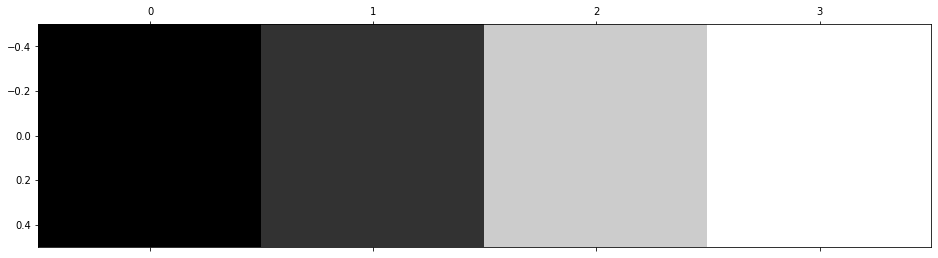

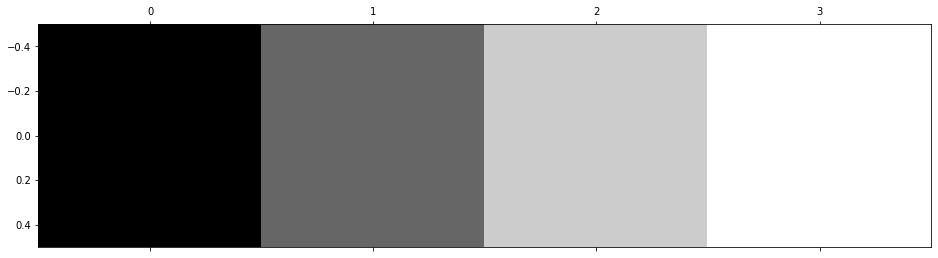

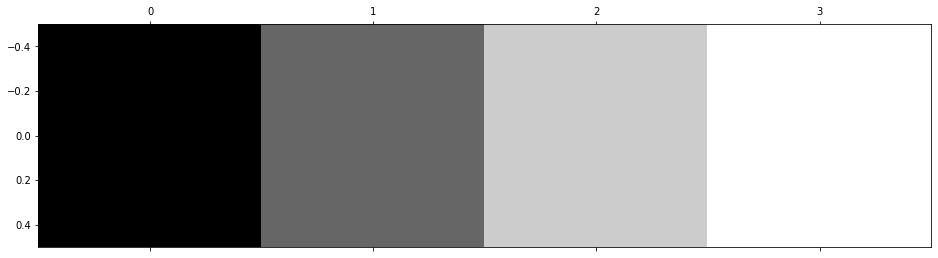

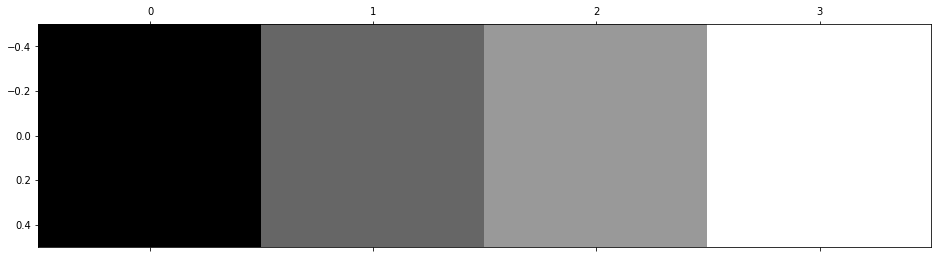

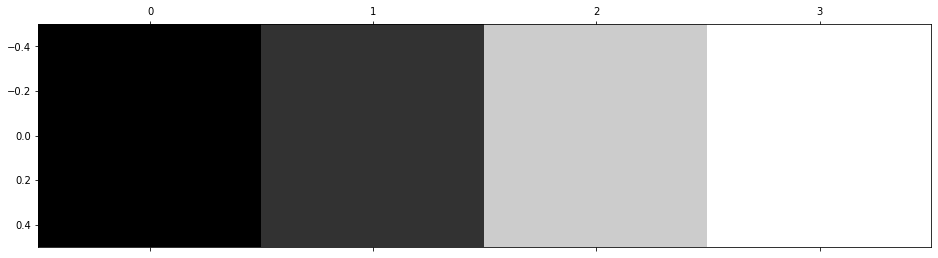

In [ ]:
for i in range(5):
    plt.matshow(np.reshape(features[i], (-1, 4)), cmap=plt.cm.binary)
plt.show()

## Function to Add Noise to Data

In [ ]:
def noise(image):
    noisy = image
    size = image.shape
    mean = 0
    sigma = 3
    gauss = np.random.normal(mean, sigma, size)
    gauss = np.round_(gauss)
    for i, num in enumerate(noisy):
        if num*-1 == gauss[i]:
            noisy[i] = gauss[i]
    return noisy

## Function to Calculate Hebb Weight

In [ ]:
def hebb_weight(patterns):
    row, col = np.shape(patterns)
    weight = np.multiply(np.matmul(patterns.T, patterns),(np.ones(col) - np.identity(col)))
    return weight
def discrete(x):
    if x>=0: return 1
    else: return -1    

## Function to implement Hopfield Network

In [ ]:
def hopfield_network(noisy, patterns, n_iter):
    weight = np.array(hebb_weight(patterns))
    col, row = np.shape(weight)
    output = np.zeros(col)
    temp = noisy
    for i in range(1, n_iter+1):
        plt.matshow(np.reshape(temp, (-1, 4)), cmap=plt.cm.binary)
        for k in np.random.permutation(col):
            if (weight[k,].any()!=0.0):
                temp[k] = discrete(np.matmul(weight[k,],temp))
        if (temp==output).all():
            break
        output = temp
    return output, i

## Running the Network and Visualizing Patterns

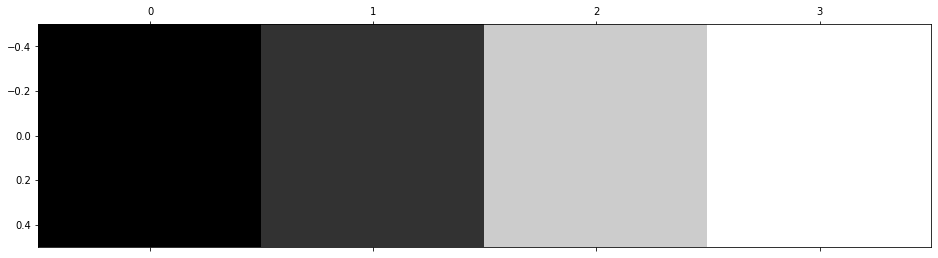

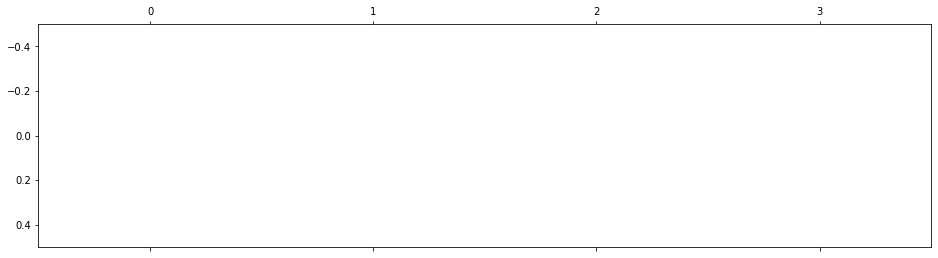

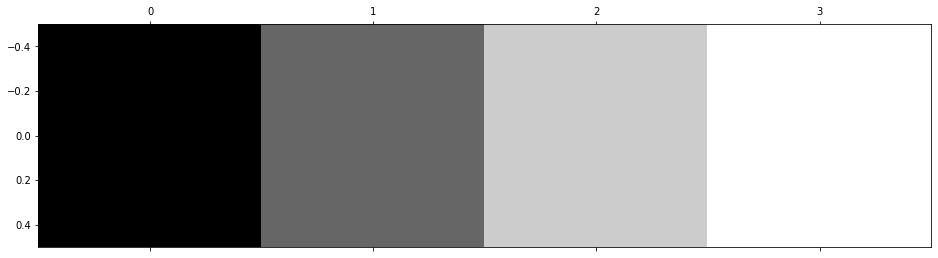

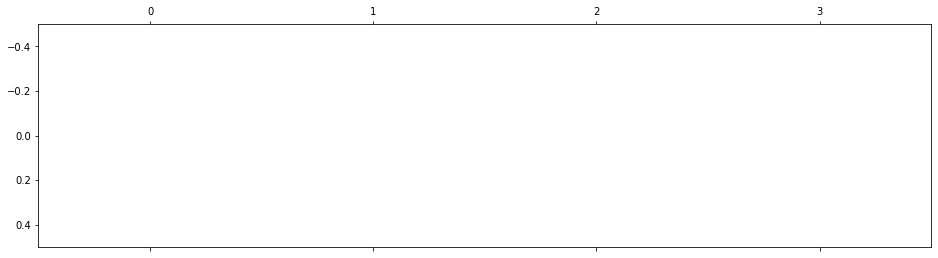

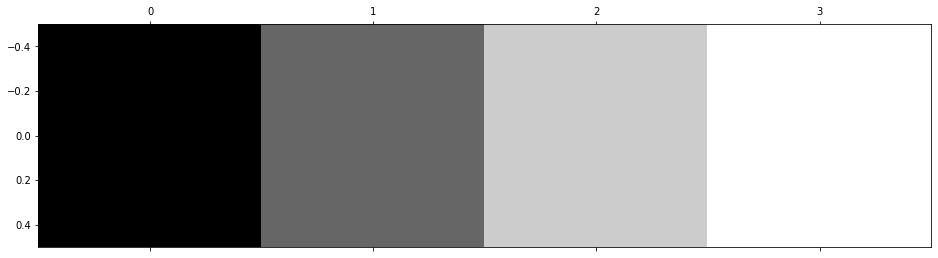

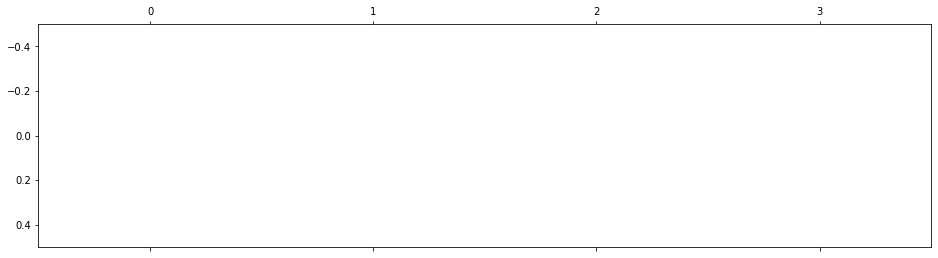

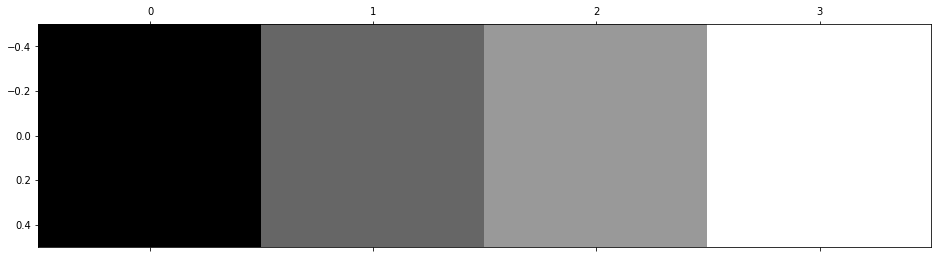

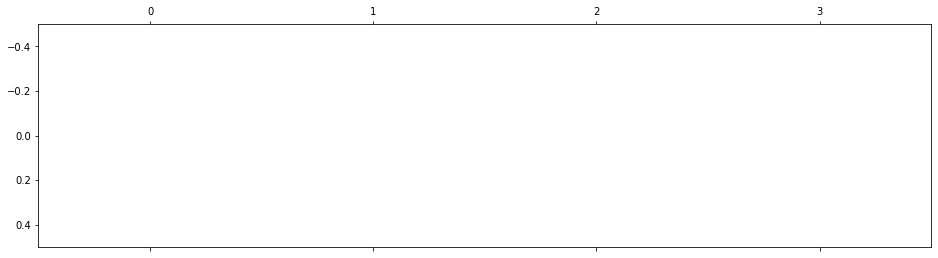

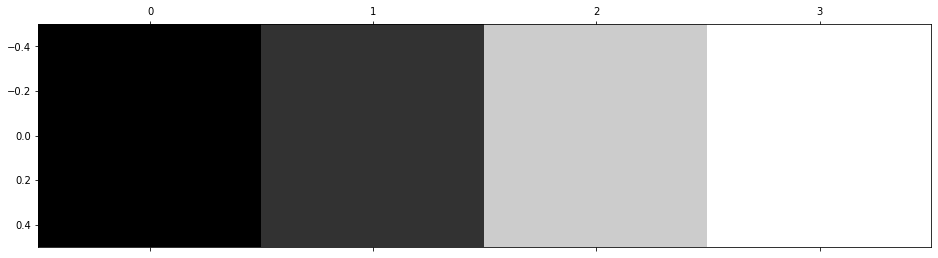

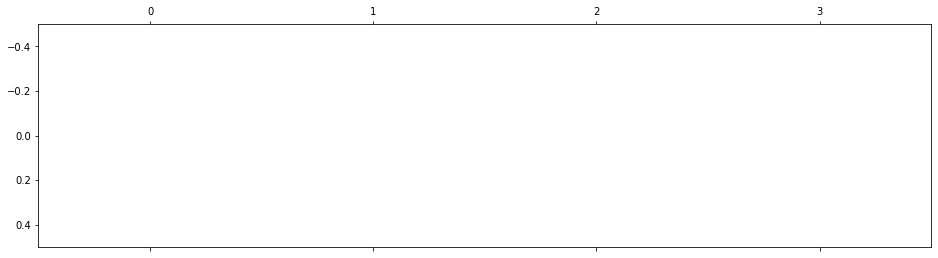

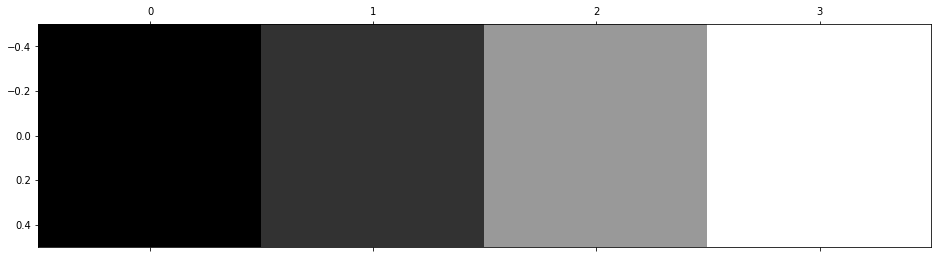

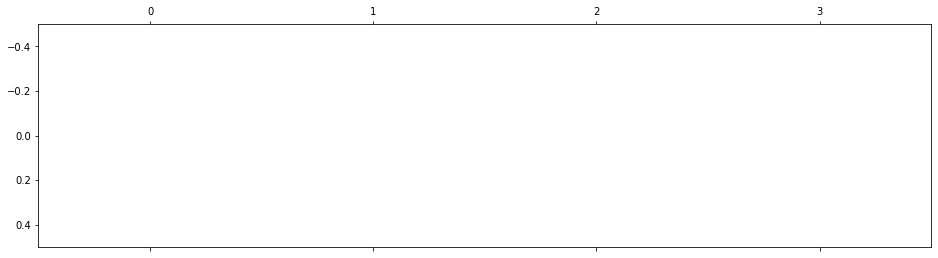

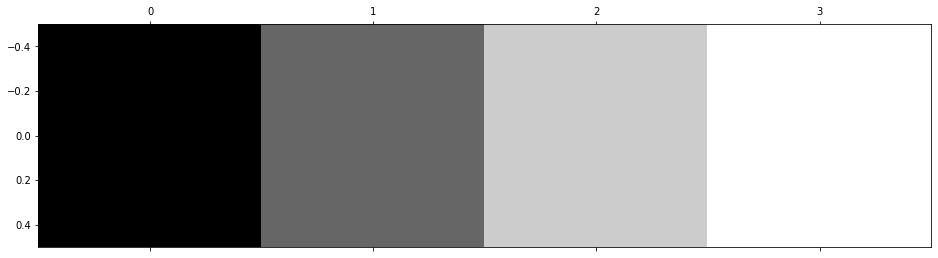

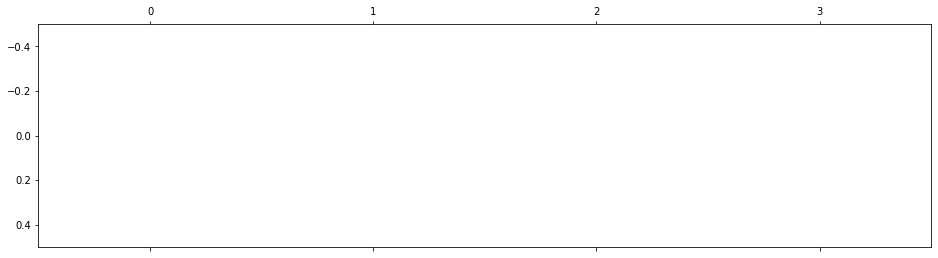

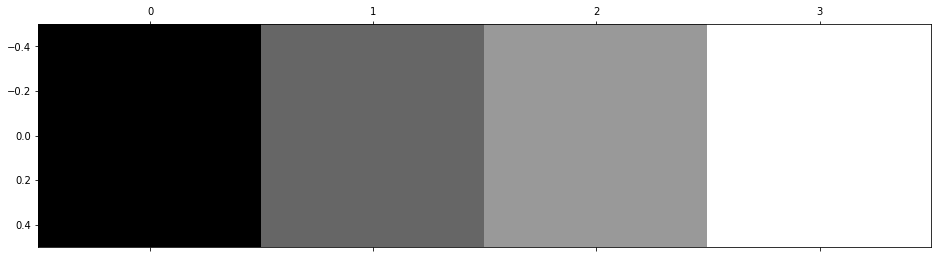

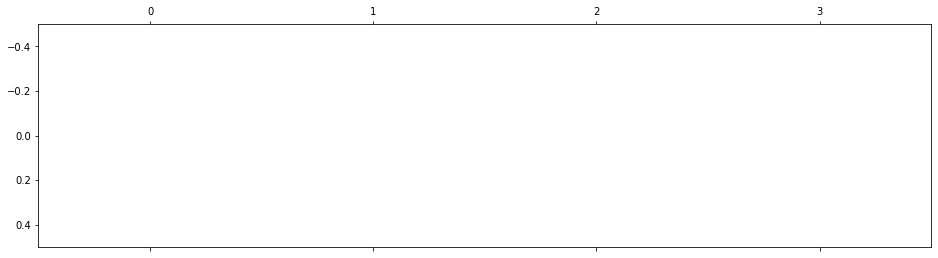

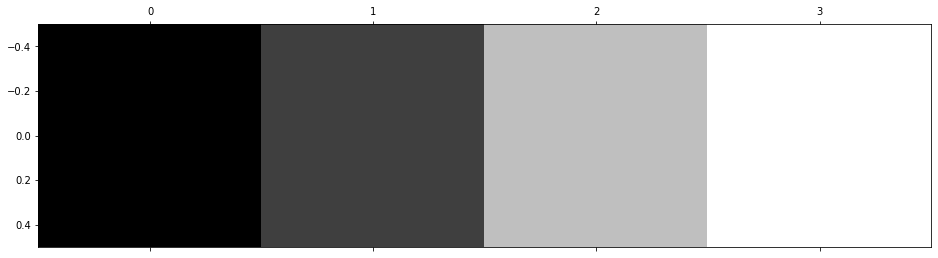

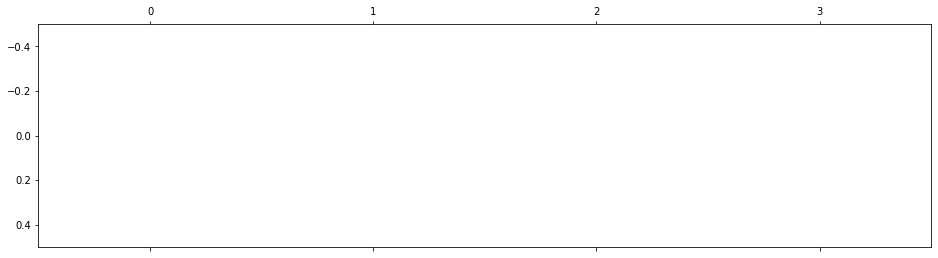

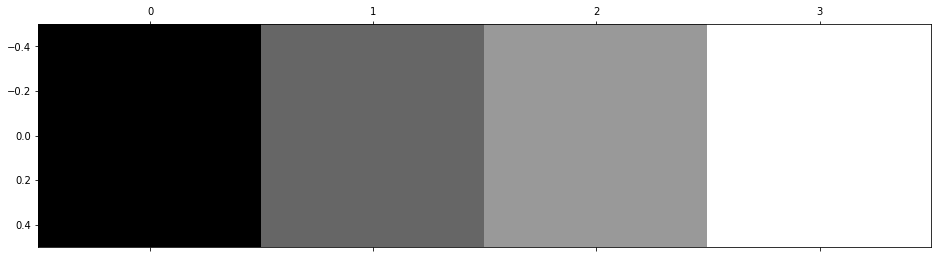

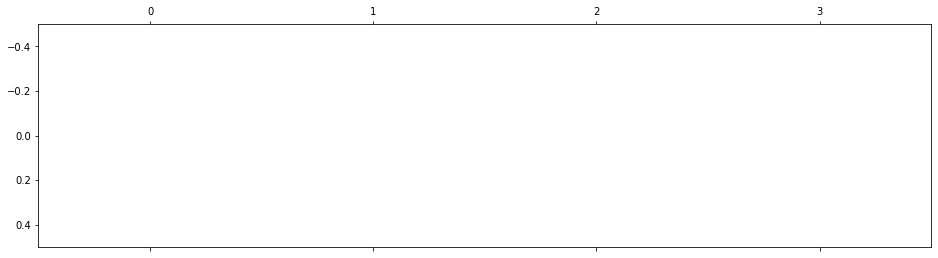

In [ ]:
toNoise = features
noisy = [noise(wi) for wi in toNoise]
tonetwork = features
toNetwork = [noise(wi) for wi in tonetwork]
patterns = features
for i in range(10):
    output, niter = hopfield_network(toNetwork[i], patterns, 200)
plt.show()